In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/epinyoanun/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [132]:
x1 = np.arange(-100,100)
y = np.power(x1,3)

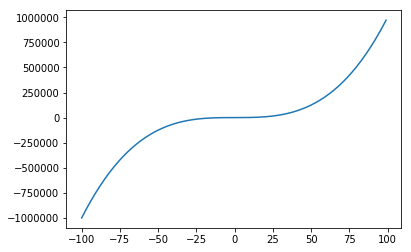

In [133]:
plt.plot(x1,y)

In [52]:
pd.DataFrame(data=np.array((x1,y)).T, columns=['x1','y']).head()

,x1,y
0,-100,-1000000
1,-99,-970299
2,-98,-941192
3,-97,-912673
4,-96,-884736


### Linear Classification

### 1. Train

In [62]:
feature_x1 = tf.feature_column.numeric_column('x1')
input_func = tf.estimator.inputs.numpy_input_fn( x={'x1':x1},
                                                 y=y,
                                                 batch_size=100,
                                                 num_epochs=999999,
                                                 shuffle=True)
optimizer = tf.train.AdamOptimizer(learning_rate=0.3)
model = tf.estimator.LinearRegressor(feature_columns=[feature_x1], optimizer=optimizer)
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmppwy5ne2q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x131ea6940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716

### 2. Predict

In [63]:
input_func_predict = tf.estimator.inputs.numpy_input_fn(x={
    'x1':x1
},shuffle=False)
predict = model.predict(input_fn=input_func_predict)

predict_result = []
for i,p in enumerate(predict):
    predict_result.append(p['predictions'][0])
predict_result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmppwy5ne2q/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[-29499.629,
 -29205.03,
 -28910.432,
 -28615.832,
 -28321.232,
 -28026.633,
 -27732.033,
 -27437.436,
 -27142.836,
 -26848.236,
 -26553.637,
 -26259.037,
 -25964.44,
 -25669.84,
 -25375.24,
 -25080.64,
 -24786.041,
 -24491.441,
 -24196.844,
 -23902.244,
 -23607.645,
 -23313.045,
 -23018.445,
 -22723.848,
 -22429.248,
 -22134.648,
 -21840.049,
 -21545.45,
 -21250.85,
 -20956.252,
 -20661.652,
 -20367.053,
 -20072.453,
 -19777.854,
 -19483.256,
 -19188.656,
 -18894.057,
 -18599.457,
 -18304.857,
 -18010.26,
 -17715.66,
 -17421.06,
 -17126.46,
 -16831.861,
 -16537.264,
 -16242.662,
 -15948.063,
 -15653.464,
 -15358.864,
 -15064.266,
 -14769.666,
 -14475.067,
 -14180.468,
 -13885.868,
 -13591.27,
 -13296.67,
 -13002.071,
 -12707.472,
 -12412.872,
 -12118.273,
 -11823.674,
 -11529.074,
 -11234.476,
 -10939.876,
 -10645.276,
 -10350.678,
 -10056.078,
 -9761.4795,
 -9466.88,
 -9172.28,
 -8877.682,
 -8583.082,
 -8288.483,
 -7993.8843,
 -7699.2847,
 -7404.6855,
 -7110.0864,
 -6815.4873,
 -6520

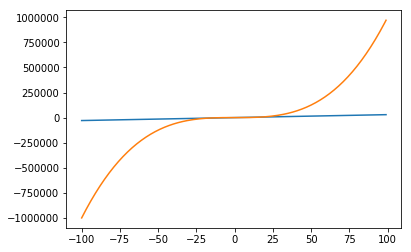

In [64]:
plt.plot(x1,predict_result)
plt.plot(x1,y)

### DNN Regression

### 1. Train

In [189]:
feature_x1 = tf.feature_column.numeric_column('x1')
input_func_dnn = tf.estimator.inputs.numpy_input_fn(
    x={'x1':x1},
    y=y,
    batch_size=128,
    num_epochs=10000,
    shuffle=True)
dnn_model = tf.estimator.DNNRegressor(hidden_units=[4],
                                     feature_columns=[feature_x1],
                                     optimizer = tf.train.AdamOptimizer(learning_rate=0.1),
                                     model_dir='tmp/tensorboard')
dnn_model.train(input_fn=input_func_dnn,steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/tensorboard', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x137cc4da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/tensorboard/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10001 into tmp/tenso

INFO:tensorflow:loss = 71425410000.0, step = 16901 (0.095 sec)
INFO:tensorflow:global_step/sec: 1067.43
INFO:tensorflow:loss = 40704606000.0, step = 17001 (0.094 sec)
INFO:tensorflow:global_step/sec: 1091.68
INFO:tensorflow:loss = 83093774000.0, step = 17101 (0.092 sec)
INFO:tensorflow:global_step/sec: 1053.46
INFO:tensorflow:loss = 50181374000.0, step = 17201 (0.095 sec)
INFO:tensorflow:global_step/sec: 941.187
INFO:tensorflow:loss = 58310410000.0, step = 17301 (0.106 sec)
INFO:tensorflow:global_step/sec: 964.878
INFO:tensorflow:loss = 65590910000.0, step = 17401 (0.104 sec)
INFO:tensorflow:global_step/sec: 1088.86
INFO:tensorflow:loss = 53827936000.0, step = 17501 (0.092 sec)
INFO:tensorflow:global_step/sec: 990.503
INFO:tensorflow:loss = 56999290000.0, step = 17601 (0.101 sec)
INFO:tensorflow:global_step/sec: 1029.26
INFO:tensorflow:loss = 67625130000.0, step = 17701 (0.097 sec)
INFO:tensorflow:global_step/sec: 1058.4
INFO:tensorflow:loss = 70078710000.0, step = 17801 (0.094 sec)
IN

### 2. Evaluate

In [54]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    x={'x1':x1},
    y=y,
    batch_size=1000,
    num_epochs=1,
    shuffle=False)
dnn_model.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-30-01:26:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpi_pl97a3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-30-01:26:57
INFO:tensorflow:Saving dict for global step 10000: average_loss = 6455109000.0, global_step = 10000, loss = 1291021800000.0


{'average_loss': 6455109000.0, 'loss': 1291021800000.0, 'global_step': 10000}

### 3. Predict

In [190]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(x={
    'x1':x1
},shuffle=False)
predict = dnn_model.predict(input_fn=input_fn_predict)

predict_result = []
for i,p in enumerate(predict):
    predict_result.append(p['predictions'][0])
predict_result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/tensorboard/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[-948962.8,
 -927877.6,
 -906792.56,
 -885707.56,
 -864622.3,
 -843537.2,
 -822452.1,
 -801367.0,
 -780281.8,
 -759196.75,
 -738111.7,
 -717026.5,
 -695941.4,
 -674856.25,
 -653771.25,
 -632686.06,
 -611600.94,
 -590515.8,
 -569430.7,
 -548345.56,
 -527260.56,
 -506175.38,
 -485090.28,
 -464005.16,
 -442920.03,
 -421834.9,
 -400749.8,
 -379664.72,
 -358579.53,
 -337494.4,
 -326236.2,
 -316546.94,
 -306857.75,
 -297168.5,
 -287479.25,
 -277790.03,
 -268100.78,
 -258411.53,
 -248722.33,
 -239033.08,
 -229343.84,
 -219654.64,
 -209965.39,
 -200276.19,
 -190586.94,
 -180897.69,
 -171208.48,
 -161519.25,
 -151830.0,
 -142140.8,
 -132451.55,
 -122762.3,
 -113073.1,
 -103383.85,
 -93694.6,
 -84005.4,
 -74316.16,
 -64626.953,
 -54937.707,
 -45248.46,
 -35559.258,
 -25870.014,
 -16180.766,
 -6491.5415,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.42043,
 61.4204

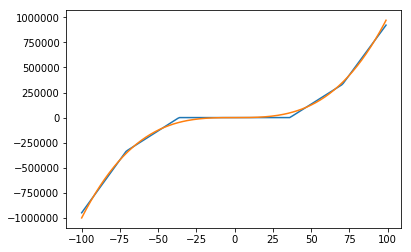

In [192]:
plt.plot(x1,predict_result)
plt.plot(x1,y)

In [75]:
tf.estimator.DNNRegressor.get_variable_names(dnn_model)
print(tf.estimator.LinearClassifier.get_variable_value(dnn_model, 'dnn/hiddenlayer_0/kernel'))
print(tf.estimator.LinearClassifier.get_variable_value(dnn_model, 'dnn/logits/kernel'))

[[-39.914764  25.56305   15.033222  15.105981]]
[[-218.64125]
 [ 247.6338 ]
 [ 268.56256]
 [ 262.43246]]


### Raw Net

In [185]:
def get_scope_variable(scope, name, shape=None):
    with tf.variable_scope(scope, reuse=tf.AUTO_REUSE):
        v = tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())
    return v
def normal_full_layer(input_layer, size, layer_name):
    input_size = int(input_layer.get_shape()[1])
    W = get_scope_variable(layer_name, name='w', shape=[input_size, size])
    b = get_scope_variable(layer_name, name='b', shape=[size])
    return (tf.matmul(input_layer, W) + b)

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, 1], name="x")
y_true = tf.placeholder(tf.float32, shape=[None, 1], name="y_true")

# layers
layer1 = tf.nn.relu(normal_full_layer(x, 4, 'layer_1'))
layer2 = tf.nn.relu(normal_full_layer(layer1, 4, 'layer_2'))
y_pred = normal_full_layer(layer2, 1, 'to_activation')
# or using tf function
# layer1 = tf.layers.dense(x, 10, tf.nn.relu)
# y_pred = tf.layers.dense(layer1, 1)


# optimization
error = tf.reduce_sum( tf.square(y_pred - y_true) ) # tf.losses.mean_squared_error(y_true, y_pred)
optimizer = tf.train.AdamOptimizer(learning_rate=1)
train = optimizer.minimize(error)

# Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

steps = 1000
for i in range(steps):
    _, error_val = sess.run([train, error], feed_dict={x:x1.reshape([-1,1]), y_true:y.reshape([-1,1])})
    if(i==0 or (i+1)%100==0):
        print('Current Step: {}, error:{}'.format(i+1,error_val))

Current Step: 1, error:28581824561152.0
Current Step: 100, error:4183857037312.0
Current Step: 200, error:2261595455488.0
Current Step: 300, error:294638780416.0
Current Step: 400, error:134812155904.0
Current Step: 500, error:99499524096.0
Current Step: 600, error:79475884032.0
Current Step: 700, error:89594544128.0
Current Step: 800, error:94197252096.0
Current Step: 900, error:57283575808.0
Current Step: 1000, error:56526667776.0


In [182]:
tf.global_variables()

[<tf.Variable 'layer_1/w:0' shape=(1, 4) dtype=float32_ref>,
 <tf.Variable 'layer_1/b:0' shape=(4,) dtype=float32_ref>,
 <tf.Variable 'to_activation/w:0' shape=(4, 1) dtype=float32_ref>,
 <tf.Variable 'to_activation/b:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'layer_1/w/Adam:0' shape=(1, 4) dtype=float32_ref>,
 <tf.Variable 'layer_1/w/Adam_1:0' shape=(1, 4) dtype=float32_ref>,
 <tf.Variable 'layer_1/b/Adam:0' shape=(4,) dtype=float32_ref>,
 <tf.Variable 'layer_1/b/Adam_1:0' shape=(4,) dtype=float32_ref>,
 <tf.Variable 'to_activation/w/Adam:0' shape=(4, 1) dtype=float32_ref>,
 <tf.Variable 'to_activation/w/Adam_1:0' shape=(4, 1) dtype=float32_ref>,
 <tf.Variable 'to_activation/b/Adam:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'to_activation/b/Adam_1:0' shape=(1,) dtype=float32_ref>]

In [183]:
w_b = [v for v in tf.global_variables() if v.name == 'layer_1/w:0' or v.name == 'layer_1/b:0']
w_val = w_b[0].eval()
b_val = w_b[1].eval()
w_val, b_val

(array([[ 1.4114380e-03,  2.5528532e+01,  3.2637684e+01, -4.7869476e+01]],
       dtype=float32),
 array([-4.6450573e-01, -8.7432294e+02, -8.3879303e+02, -8.5998944e+02],
       dtype=float32))

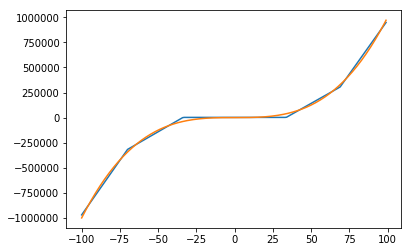

In [186]:
y_pred_val = sess.run([y_pred], feed_dict={x:x1.reshape([-1,1]), y_true:y.reshape([-1,1])})
plt.plot(x1, np.array(y_pred_val).reshape(-1))
plt.plot(x1,y)